In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [2]:
imdb_all = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
imdb_all.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


**Data cleaning & handling**

In [3]:
imdb_all['Gross'] = imdb_all['Gross'].str.replace(',', '')
imdb_all['Gross'] = pd.to_numeric(imdb_all['Gross'])
imdb_all['Gross'] = imdb_all['Gross'].fillna(imdb_all['Gross'].mean())

imdb_all['Certificate'] = imdb_all['Certificate'].fillna('No certificate')
imdb_all['Meta_score'] = imdb_all['Meta_score'].fillna(imdb_all['Meta_score'].mean())

imdb_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


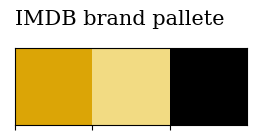

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.palplot(['#DBA506', '#F2DB83', '#000000'])

plt.title("IMDB brand pallete",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

**Which combination of director, actor and genre is the most profitable**

In [5]:
director_gross = imdb_all[['Director', 'Gross']]


director_gross = director_gross.groupby('Director').agg(['mean', 'count'])
director_gross = director_gross[director_gross[('Gross', 'count')] > 2]
df = director_gross.sort_values(('Gross', 'mean'), ascending=False)[:20]
df[('Gross', 'mean')] = round(df[('Gross', 'mean')] / 1000000, 2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


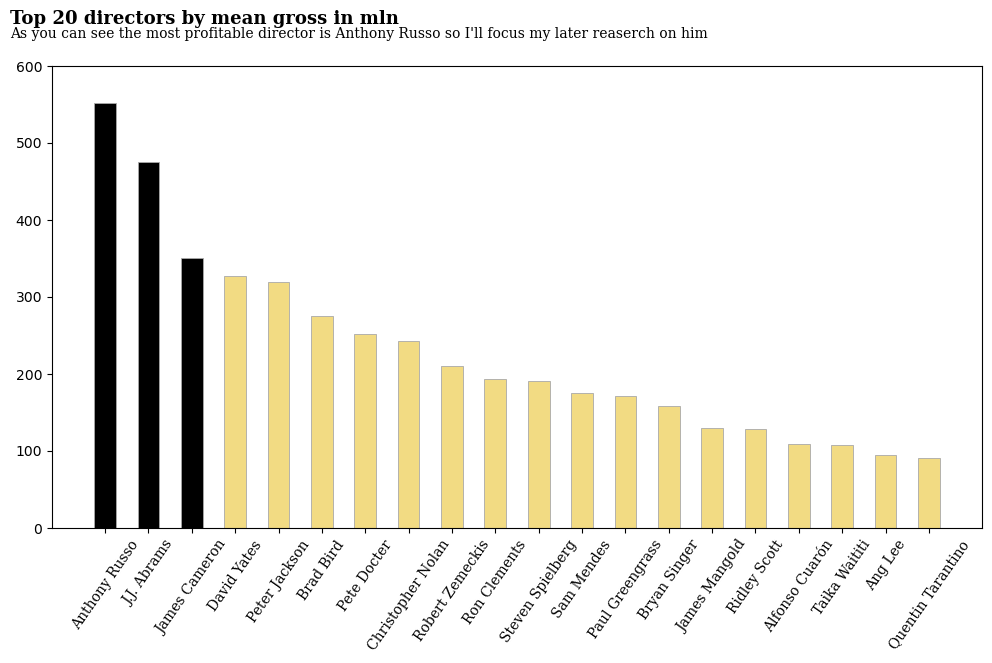

In [6]:
color_map = ['#F2DB83' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  '#000000'

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(df.index, df[('Gross', 'mean')], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

ax.set_xticklabels(df.index, fontfamily='serif', rotation=55)

fig.text(0.09, 0.95, 'Top 20 directors by mean gross in mln', fontsize=13, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.90, '''
As you can see the most profitable director is Anthony Russo so I'll focus my later reaserch on him
''', fontsize=10, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 700, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)

plt.show()

In [7]:
imdb_all['Genre_split'] = imdb_all['Genre'].apply(lambda x: x.split(', '))

genres = pd.DataFrame(columns=['Genre', 'Gross'])
for x in range(len(imdb_all)):
    row = imdb_all.iloc[x]
    for el in row['Genre_split']:
        new_row = {'Genre': el, 'Gross': row['Gross']}
        genres = genres.append(new_row, ignore_index=True)
df = genres.groupby('Genre').mean().sort_values('Gross', ascending=False)[:10]
df['Gross'] = round(df['Gross'] / 1000000, 2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


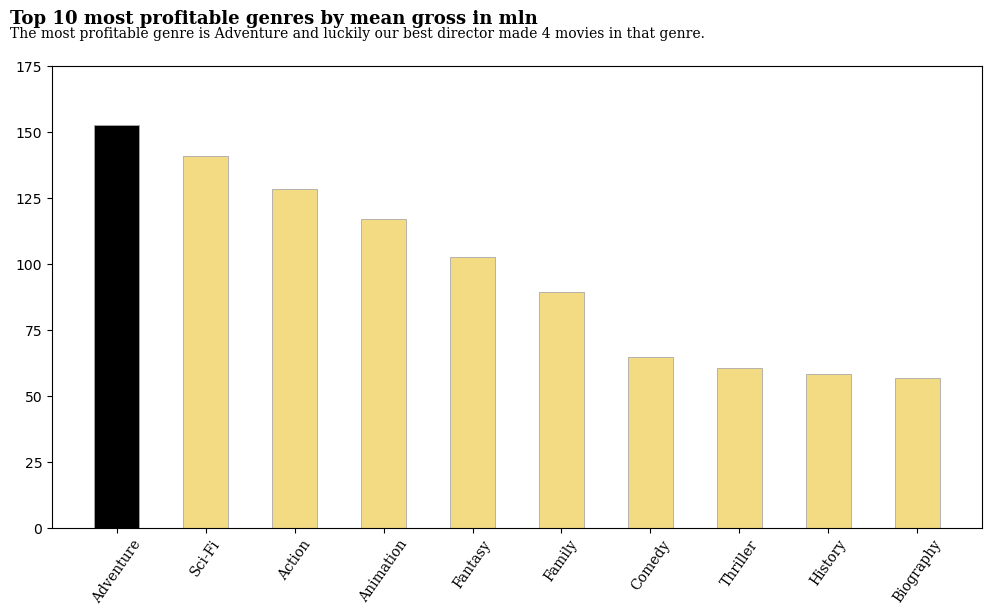

In [8]:
color_map = ['#F2DB83' for _ in range(10)]
color_map[0] = '#000000'

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(df.index, df[('Gross')], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

ax.set_xticklabels(df.index, fontfamily='serif', rotation=55)

fig.text(0.09, 0.95, 'Top 10 most profitable genres by mean gross in mln', fontsize=13, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.90, '''
The most profitable genre is Adventure and luckily our best director made 4 movies in that genre.
''', fontsize=10, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 200, 25) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)

plt.show()

In [9]:
stars = [*imdb_all['Star1'].unique(), *imdb_all['Star2'].unique(), *imdb_all['Star3'].unique(), *imdb_all['Star4'].unique()]
stars = set(stars)

star1 = imdb_all.groupby('Star1')['Gross'].agg(['sum', 'count'])
star1['sum'] = round(star1['sum'] / 1000000, 3)
star2 = imdb_all.groupby('Star2')['Gross'].agg(['sum', 'count'])
star2['sum'] = round(star2['sum'] / 1000000, 3)
star3 = imdb_all.groupby('Star3')['Gross'].agg(['sum', 'count'])
star3['sum'] = round(star3['sum'] / 1000000, 3)
star4 = imdb_all.groupby('Star4')['Gross'].agg(['sum', 'count'])
star4['sum'] = round(star4['sum'] / 1000000, 3)

star_gross = pd.DataFrame(data = np.zeros((len(stars), 2)), 
                          index = stars, columns=['sum_gross', 'num_gross'])

def add_gross(gross, star):
    gross = gross.join(star)
    gross['sum_gross'] = gross['sum_gross'].add(gross['sum'], fill_value=0)
    gross['num_gross'] = gross['num_gross'].add(gross['count'], fill_value=0)
    gross = gross.drop(['count', 'sum'], axis=1).sort_values('num_gross', ascending=False)
    return gross

star_gross = add_gross(star_gross, star1)
star_gross = add_gross(star_gross, star2)
star_gross = add_gross(star_gross, star3)
star_gross = add_gross(star_gross, star4)

star_gross['mean'] = star_gross['sum_gross'] / star_gross['num_gross']

star_gross = star_gross[star_gross['num_gross'] > 5.0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


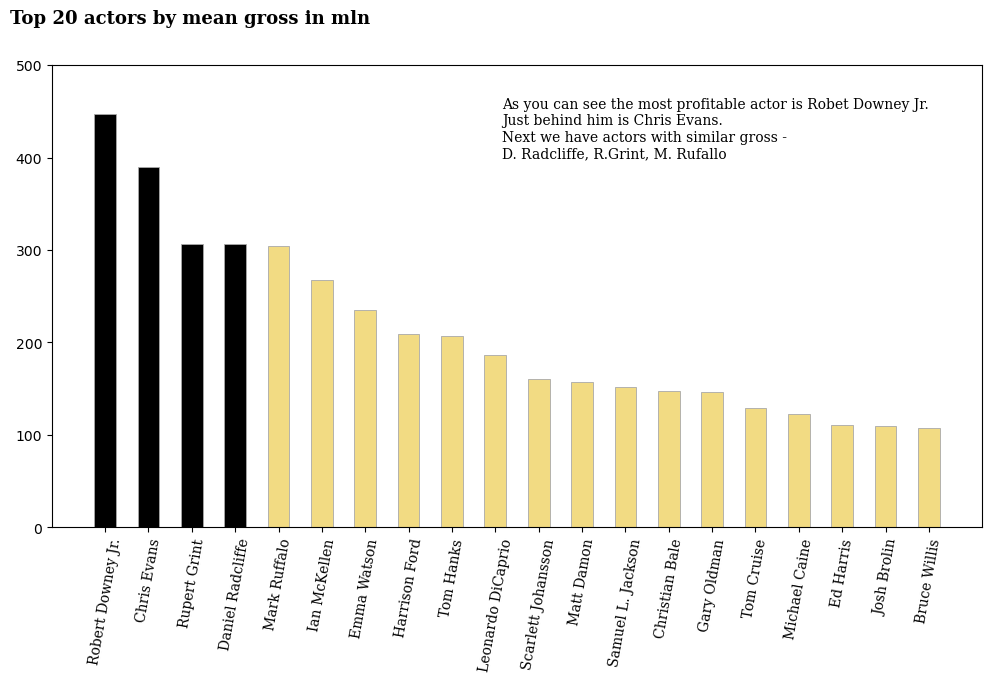

In [10]:
color_map = ['#F2DB83' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  color_map[3] = '#000000'

df = star_gross.sort_values('mean', ascending=False)[:20]

fig_1, ax_1 = plt.subplots(1,1, figsize=(12, 6))
ax_1.bar(df.index, df['mean'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

ax_1.set_xticklabels(df.index, fontfamily='serif', rotation=80)
ax_1.xaxis.set_label_coords(.09, 0.09)
grid_y_ticks = np.arange(0, 600, 100) # y ticks, min, max, then step
ax_1.set_yticks(grid_y_ticks)

fig_1.text(0.09, 0.95, 'Top 20 actors by mean gross in mln', fontsize=13, fontweight='bold', fontfamily='serif')
fig_1.text(0.5, 0.7, '''
As you can see the most profitable actor is Robet Downey Jr. 
Just behind him is Chris Evans. 
Next we have actors with similar gross - 
D. Radcliffe, R.Grint, M. Rufallo
''', fontsize=10, fontweight='light', fontfamily='serif')


plt.show()

**Finall conclusion**

Using my analysis I think that the most profitable movie would be made of:
* Anthony Russo as director
* Robert Downey Jr., Chris Evans, Daniel Radcliffe and Robert Grint as actors
* Adveture genre